In [1]:
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [75]:
# load the data
tm_data = pd.read_csv('./Data/Time_series/international-airline-passengers.csv')

In [25]:
tm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
Month                                                                             145 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [26]:
tm_data.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [76]:
# train, test = train_test_split(tm_data, test_size=0.3) # it will split the data after shuffling it which is good
# at many places but not for time-series data

# to maintain the linearity in the series, splitting it manually
train = tm_data[:int(0.7*len(tm_data))]
test = tm_data[int(0.7*len(tm_data)):]

In [100]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 1 columns):
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    101 non-null float64
dtypes: float64(1)
memory usage: 888.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 101 to 143
Data columns (total 1 columns):
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    43 non-null float64
dtypes: float64(1)
memory usage: 688.0 bytes
None


In [77]:

#PreProcessing since ARIMA takes UNIVariate series as input
train.drop('Month',axis=1, inplace=True)
train.dropna(inplace=True, axis=0)
print(train.isnull().any())

test.drop('Month',axis=1, inplace=True)
test.dropna(axis=0, inplace=True)
print(test.isnull().any())

print(test.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
Month                                                                             101 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [86]:
#plotting the data
train['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot()
test['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot()

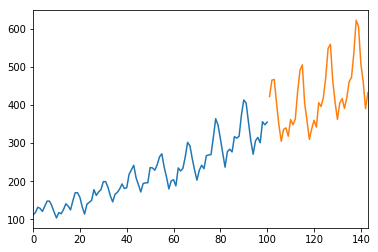

In [87]:
import matplotlib.pyplot as plt
plt.show()

In [101]:
# Uncomment to install pytramid-arima if need
# !pip install pyramid-arima

In [68]:
#Building the model
from pyramid.arima import auto_arima

In [88]:
model = auto_arima(train['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
                         trace=True, error_action='ignore')#, suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=895.566, BIC=911.197, Fit time=0.568 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=917.952, BIC=923.162, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=915.557, BIC=923.372, Fit time=0.066 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=913.419, BIC=921.234, Fit time=0.088 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=894.597, BIC=907.623, Fit time=0.370 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=908.790, BIC=919.211, Fit time=0.162 seconds


/home/amit/anaconda3/envs/VenvPandas/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=896.545, BIC=912.176, Fit time=0.530 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=903.738, BIC=914.159, Fit time=0.250 seconds
Total fit time: 2.067 seconds


In [89]:
model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

In [90]:
forecast = model.predict(n_periods=len(test))
train_pred = model.predict(n_periods=len(train))

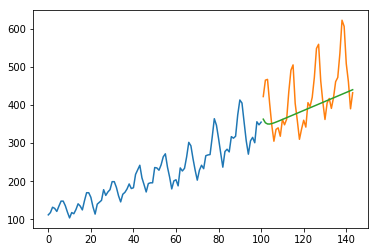

In [91]:
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()


In [94]:
#calculate rmse
import math
rms = math.sqrt(mean_squared_error(test,forecast))
print(rms)

74.20820835512508


#### Reference
https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29